In [1]:
import numpy as np
import xarray as xr
import pandas as pd
from salishsea_tools import viz_tools, places, visualisations
from matplotlib import pyplot as plt, dates
from datetime import datetime, timedelta
from calendar import month_name
from scipy.io import loadmat
from tqdm.notebook import tqdm
from salishsea_tools import nc_tools
from dask.diagnostics import ProgressBar
import cmocean

%matplotlib inline

In [2]:
plt.rcParams.update({'font.size': 12, 'axes.titlesize': 'medium'})

# Load files from monthly averages

## Z1 grazing on Diatoms

In [3]:
#years, months, data
monthly_array_Z1diatoms_depthint_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['GRMICZDIAT']
# Temporary list dict
data = {}
# Permanent aggregate dict
#aggregates = {var: {} for var in variables}
#monthlydat = {var: {} for var in variables}

# Loop through years
for year in [2007,2008,2009,2010,2011,2012,2015,2016,2017,2018,2019,2020]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_dia2_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_Z1diatoms_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['GRMICZDIAT']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    
    
# Loop through years for wrap files
for year in [2013,2014]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r_wrap/SalishSea_1m_{datestr}_{datestr}'
        
         # Load grazing variables
        with xr.open_dataset(prefix + '_dia2_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_Z1diatoms_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['GRMICZDIAT']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    
    
    
    
    
    
    
    # Concatenate months
    #for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)
# # Calculate 5 year mean and anomalies
# for var in variables:
#     aggregates[var][‘mean’] = np.concatenate([aggregates[var][year][None, ...] for year in years]).mean(axis=0)
#     for year in years: aggregates[var][year] = aggregates[var][year] - aggregates[var][‘mean’]









In [5]:
monthly_array_Z1diatoms_depthint_slice=np.where(np.isnan(monthly_array_Z1diatoms_depthint_slice), 0, monthly_array_Z1diatoms_depthint_slice)
monthly_array_Z1diatoms_depthint_slicemean = \
np.nanmean(np.nanmean(monthly_array_Z1diatoms_depthint_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_Z1diatoms_depthint_slicemean))

(14, 12)


### Select 4 warmest and 4 coldest years; leave NPGO "neutral" years out

In [6]:
#2008, 2010, 2011, 2012
NPGO_C_Z1diat=(((+monthly_array_Z1diatoms_depthint_slicemean[1,:]+\
        monthly_array_Z1diatoms_depthint_slicemean[3,:]+\
        monthly_array_Z1diatoms_depthint_slicemean[4,:]+monthly_array_Z1diatoms_depthint_slicemean[5,:])/4)*86400)

In [7]:
#2015, 2018, 2019, 2020
NPGO_W_Z1diat=(((monthly_array_Z1diatoms_depthint_slicemean[8,:]+\
        monthly_array_Z1diatoms_depthint_slicemean[11,:]+monthly_array_Z1diatoms_depthint_slicemean[12,:]+\
        monthly_array_Z1diatoms_depthint_slicemean[13,:])/4)*86400)

In [8]:
NPGO_C_Z1diat.max()

5.269110881841166

In [9]:
NPGO_W_Z1diat.max()

6.082721936948906

# Load files from monthly averages

## Z1 grazing on Nanoflagellates

In [10]:

#years, months, data
monthly_array_Z1flag_depthint_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['GRMICZPHY']
# Temporary list dict
data = {}
# Permanent aggregate dict
#aggregates = {var: {} for var in variables}
#monthlydat = {var: {} for var in variables}

# Loop through years
for year in [2007,2008,2009,2010,2011,2012,2015,2016,2017,2018,2019,2020]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_dia2_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_Z1flag_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['GRMICZPHY']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    
# Loop through years for wrap files
for year in [2013,2014]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r_wrap/SalishSea_1m_{datestr}_{datestr}'
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_dia2_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_Z1flag_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['GRMICZPHY']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    
    
    
    
    # Concatenate months
    #for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)
# # Calculate 5 year mean and anomalies
# for var in variables:
#     aggregates[var][‘mean’] = np.concatenate([aggregates[var][year][None, ...] for year in years]).mean(axis=0)
#     for year in years: aggregates[var][year] = aggregates[var][year] - aggregates[var][‘mean’]







In [11]:
monthly_array_Z1flag_depthint_slice[monthly_array_Z1flag_depthint_slice == 0 ] = np.nan
monthly_array_Z1flag_depthint_slicemean = \
np.nanmean(np.nanmean(monthly_array_Z1flag_depthint_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_Z1flag_depthint_slicemean))

(14, 12)


### Select 4 warmest and 4 coldest years; leave NPGO "neutral" years out

In [12]:
#2008,2010, 2011, 2012
NPGO_C_Z1flag=(((+monthly_array_Z1flag_depthint_slicemean[1,:]+\
        monthly_array_Z1flag_depthint_slicemean[3,:]+\
        monthly_array_Z1flag_depthint_slicemean[4,:]+monthly_array_Z1flag_depthint_slicemean[5,:])/4)*86400)

In [13]:
#2015, 2018, 2019, 2020
NPGO_W_Z1flag=(((monthly_array_Z1flag_depthint_slicemean[8,:]+\
        monthly_array_Z1flag_depthint_slicemean[11,:]+monthly_array_Z1flag_depthint_slicemean[12,:]+\
        monthly_array_Z1flag_depthint_slicemean[13,:])/4)*86400)

#### Z1 Grazing on both diatoms and nanoflagelles for Cold Years

In [14]:
NPGO_C_Z1Both=NPGO_C_Z1diat+NPGO_C_Z1flag

In [15]:
NPGO_C_Z1Both

array([0.09242801, 0.38450849, 0.95099614, 4.1288924 , 6.18662897,
       6.85629322, 7.96754498, 5.66478796, 3.01750457, 0.51261184,
       0.10195913, 0.08080829])

In [16]:
#### Z1 Grazing on both diatoms and nanoflagelles for Warm Years

In [17]:
NPGO_W_Z1Both=NPGO_W_Z1diat+NPGO_W_Z1flag

In [18]:
NPGO_W_Z1Both

array([0.12857472, 0.47069372, 3.54082347, 6.77116774, 5.64052142,
       6.68457127, 6.89882903, 5.5336253 , 2.14027849, 0.33401115,
       0.13081578, 0.07200105])

In [19]:
NPGO_C_Z1Both.mean()

2.995413666604286

In [20]:
NPGO_W_Z1Both.mean()

3.195492761259221

### Load monthly average files for Z1 biomass

In [21]:


#years, months, data
monthly_array_microzooplankton_depthint_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['microzooplankton']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}

# Loop through years
for year in [2007,2008,2009,2010,2011,2012,2016,2017,2018,2019,2020]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_microzooplankton_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['microzooplankton']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)

# Loop through years for wrap files
for year in [2013,2014,2015]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r_wrap/SalishSea_1m_{datestr}_{datestr}'
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_microzooplankton_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['microzooplankton']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)      
        
        
# # Calculate 5 year mean and anomalies
# for var in variables:
#     aggregates[var][‘mean’] = np.concatenate([aggregates[var][year][None, ...] for year in years]).mean(axis=0)
#     for year in years: aggregates[var][year] = aggregates[var][year] - aggregates[var][‘mean’]




In [22]:
monthly_array_microzooplankton_depthint_slice[monthly_array_microzooplankton_depthint_slice == 0 ] = np.nan
monthly_array_microzooplankton_depthint_slicemean = \
np.nanmean(np.nanmean(monthly_array_microzooplankton_depthint_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_microzooplankton_depthint_slicemean))

(14, 12)


### Select 4 warmest and 4 coldest years; leave NPGO "neutral" years out

In [23]:
#2008,2010, 2011, 2012
NPGO_C_micro=(((+monthly_array_microzooplankton_depthint_slicemean[1,:]+\
        monthly_array_microzooplankton_depthint_slicemean[3,:]+\
        monthly_array_microzooplankton_depthint_slicemean[4,:]+monthly_array_microzooplankton_depthint_slicemean[5,:])/4)*5.7*12/1000)

In [24]:
#2015, 2018, 2019, 2020
NPGO_W_micro=(((monthly_array_microzooplankton_depthint_slicemean[8,:]+\
        monthly_array_microzooplankton_depthint_slicemean[11,:]+monthly_array_microzooplankton_depthint_slicemean[12,:]+\
        monthly_array_microzooplankton_depthint_slicemean[13,:])/4)*5.7*12/1000)

Text(0.5, 1.0, 'Cold Years')

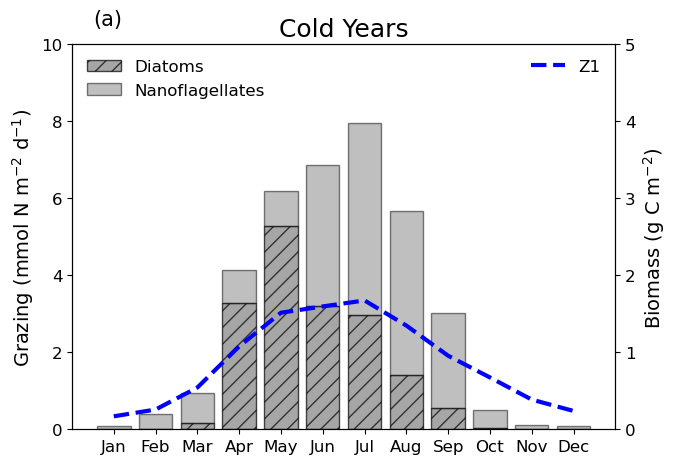

In [26]:
## Plot Figure 4a

fig, ax = plt.subplots(figsize=(7,5))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]

ax2=ax.twinx()

ax2.plot(xticks, NPGO_C_micro,label='Z1',color='b',linestyle='--',linewidth=3)


ax.bar(xticks,NPGO_C_Z1diat,color='grey',edgecolor='k',hatch='//',alpha=0.7,label='Diatoms')
ax.bar(xticks,NPGO_C_Z1flag,color='grey',edgecolor='k',label='Nanoflagellates',alpha=0.5,bottom=NPGO_C_Z1diat)



ax2.set_ylim(0,5)
ax2.set_ylabel('Biomass (g C m$^{-2}$)',fontsize=14)

ax.legend(frameon=False,loc=2)
ax2.legend(frameon=False,loc=1)
ax.set_ylim(0,10)
ax.set_ylabel('Grazing (mmol N m$^{-2}$ d$^{-1}$)',fontsize=14)
ax.set_xlabel('',fontsize=14)
#ax.tick_params(axis='x', labelrotation=0)

ax.text(-.5, 10.5, '(a)', fontsize=15,  color='k')

ax.set_title('Cold Years',fontsize=18)

#plt.savefig('Fig6a.png', bbox_inches='tight',dpi=1000,transparent=False)

Text(0.5, 1.0, 'Warm Years')

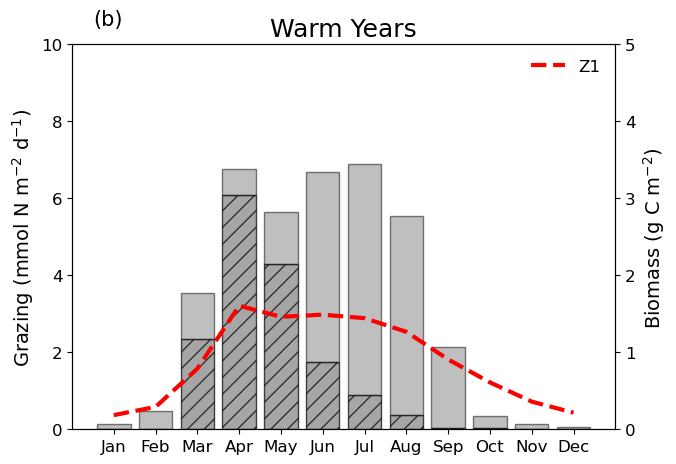

In [27]:
## Plot Figure 4b

fig, ax = plt.subplots(figsize=(7,5))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]

ax2=ax.twinx()

ax2.plot(xticks, NPGO_W_micro,label='Z1',color='r',linestyle='--',linewidth=3)


ax.bar(xticks,NPGO_W_Z1diat,color='grey',edgecolor='k',hatch='//',alpha=0.7,label='Diatoms')
ax.bar(xticks,NPGO_W_Z1flag,color='grey',edgecolor='k',label='Nanoflagellates',alpha=0.5,bottom=NPGO_W_Z1diat)



ax2.set_ylim(0,5)
ax2.set_ylabel('Biomass (g C m$^{-2}$)',fontsize=14)

ax2.legend(frameon=False,loc=1)
ax.set_ylim(0,10)
ax.set_ylabel('Grazing (mmol N m$^{-2}$ d$^{-1}$)',fontsize=14)
ax.set_xlabel('',fontsize=14)

#ax.tick_params(axis='x', labelrotation=0)
ax.text(-.5, 10.5, '(b)', fontsize=15,  color='k')

ax.set_title('Warm Years',fontsize=18)

#plt.savefig('Fig6b.png', bbox_inches='tight',dpi=1000,transparent=False)

## Z2 grazing on Diatoms

In [28]:
#years, months, data
monthly_array_Z2diatoms_depthint_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['GRMESZDIAT']
# Temporary list dict
data = {}
# Permanent aggregate dict
#aggregates = {var: {} for var in variables}
#monthlydat = {var: {} for var in variables}

# Loop through years
for year in [2007,2008,2009,2010,2011,2012,2015,2016,2017,2018,2019,2020]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_dia2_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_Z2diatoms_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['GRMESZDIAT']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    
# Loop through years for wrap files
for year in [2013,2014]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r_wrap/SalishSea_1m_{datestr}_{datestr}'
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_dia2_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_Z2diatoms_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['GRMESZDIAT']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)

    
    
    
    
    # Concatenate months
    #for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)
# # Calculate 5 year mean and anomalies
# for var in variables:
#     aggregates[var][‘mean’] = np.concatenate([aggregates[var][year][None, ...] for year in years]).mean(axis=0)
#     for year in years: aggregates[var][year] = aggregates[var][year] - aggregates[var][‘mean’]






In [29]:
monthly_array_Z2diatoms_depthint_slice[monthly_array_Z2diatoms_depthint_slice == 0 ] = np.nan
monthly_array_Z2diatoms_depthint_slicemean = \
np.nanmean(np.nanmean(monthly_array_Z2diatoms_depthint_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_Z2diatoms_depthint_slicemean))

(14, 12)


### Select 4 warmest and 4 coldest years; leave NPGO "neutral" years out

In [30]:
#2008, 2010, 2011, 2012
NPGO_C_Z2diat=(((+monthly_array_Z2diatoms_depthint_slicemean[1,:]+\
        monthly_array_Z2diatoms_depthint_slicemean[3,:]+\
        monthly_array_Z2diatoms_depthint_slicemean[4,:]+monthly_array_Z2diatoms_depthint_slicemean[5,:])/4)*86400)

In [31]:
#2015, 2018, 2019, 2020
NPGO_W_Z2diat=(((monthly_array_Z2diatoms_depthint_slicemean[8,:]+\
        monthly_array_Z2diatoms_depthint_slicemean[11,:]+monthly_array_Z2diatoms_depthint_slicemean[12,:]+\
        monthly_array_Z2diatoms_depthint_slicemean[13,:])/4)*86400)

In [32]:
NPGO_C_Z2diat.max()

9.045761145807075

In [33]:
NPGO_W_Z2diat.max()

7.123884131442539

## Z2 grazing on Nanoflagellates

In [34]:

#years, months, data
monthly_array_Z2flag_depthint_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['GRMESZPHY']
# Temporary list dict
data = {}
# Permanent aggregate dict
#aggregates = {var: {} for var in variables}
#monthlydat = {var: {} for var in variables}

# Loop through years
for year in [2007,2008,2009,2010,2011,2012,2015,2016,2017,2018,2019,2020]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_dia2_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_Z2flag_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['GRMESZPHY']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    
# Loop through years for wrap files
for year in [2013,2014]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r_wrap/SalishSea_1m_{datestr}_{datestr}'
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_dia2_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_Z2flag_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['GRMESZPHY']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    
    
    # Concatenate months
    #for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)
# # Calculate 5 year mean and anomalies
# for var in variables:
#     aggregates[var][‘mean’] = np.concatenate([aggregates[var][year][None, ...] for year in years]).mean(axis=0)
#     for year in years: aggregates[var][year] = aggregates[var][year] - aggregates[var][‘mean’]





In [35]:
monthly_array_Z2flag_depthint_slice[monthly_array_Z2flag_depthint_slice == 0 ] = np.nan
monthly_array_Z2flag_depthint_slicemean = \
np.nanmean(np.nanmean(monthly_array_Z2flag_depthint_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_Z2flag_depthint_slicemean))

(14, 12)


### Select 4 warmest and 4 coldest years; leave NPGO "neutral" years out

In [36]:
#2008,2010, 2011, 2012
NPGO_C_Z2flag=(((+monthly_array_Z2flag_depthint_slicemean[1,:]+\
        monthly_array_Z2flag_depthint_slicemean[3,:]+\
        monthly_array_Z2flag_depthint_slicemean[4,:]+monthly_array_Z2flag_depthint_slicemean[5,:])/4)*86400)

In [37]:
#2015, 2018, 2019, 2020
NPGO_W_Z2flag=(((monthly_array_Z2flag_depthint_slicemean[8,:]+\
        monthly_array_Z2flag_depthint_slicemean[11,:]+monthly_array_Z2flag_depthint_slicemean[12,:]+\
        monthly_array_Z2flag_depthint_slicemean[13,:])/4)*86400)

In [38]:
NPGO_C_Z2flag.max()

4.11498083166576

In [39]:
NPGO_W_Z2flag.max()

6.073925866195896

#### Z2 Grazing on both diatoms and nanoflagelles for Cold Years

In [40]:
NPGO_C_Z2Both=NPGO_C_Z2diat+NPGO_C_Z2flag

In [42]:
NPGO_C_Z2Both

array([0.36331005, 0.68708981, 1.41577943, 7.36208156, 9.67437716,
       8.08742049, 6.76149758, 6.73248016, 6.26949064, 1.4010652 ,
       0.37397641, 0.26510542])

#### Z2 Grazing on both diatoms and nanoflagelles for Warm Years

In [43]:
NPGO_W_Z2Both=NPGO_W_Z2diat+NPGO_W_Z2flag

In [44]:
NPGO_W_Z2Both

array([0.37761783, 0.73060259, 3.64157386, 7.14834743, 8.06739097,
       7.10395754, 7.12442123, 7.2814657 , 4.1068764 , 0.97738656,
       0.51970222, 0.25895754])

In [45]:
NPGO_C_Z2Both.mean()

4.116139492114534

In [46]:
NPGO_W_Z2Both.mean()

3.9448583222744946

### Load monthly average files for Z2 biomass

In [47]:


#years, months, data
monthly_array_mesozooplankton_depthint_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['mesozooplankton']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}

# Loop through years
for year in [2007,2008,2009,2010,2011,2012,2016,2017,2018,2019,2020]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_mesozooplankton_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['mesozooplankton']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)

# Loop through years for wrap files
for year in [2013,2014,2015]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r_wrap/SalishSea_1m_{datestr}_{datestr}'
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_mesozooplankton_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['mesozooplankton']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)      
        
        
# # Calculate 5 year mean and anomalies
# for var in variables:
#     aggregates[var][‘mean’] = np.concatenate([aggregates[var][year][None, ...] for year in years]).mean(axis=0)
#     for year in years: aggregates[var][year] = aggregates[var][year] - aggregates[var][‘mean’]




In [48]:
monthly_array_mesozooplankton_depthint_slice[monthly_array_mesozooplankton_depthint_slice == 0 ] = np.nan
monthly_array_mesozooplankton_depthint_slicemean = \
np.nanmean(np.nanmean(monthly_array_mesozooplankton_depthint_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_mesozooplankton_depthint_slicemean))

(14, 12)


### Select 4 warmest and 4 coldest years; leave NPGO "neutral" years out

In [49]:
#2008,2010, 2011, 2012
NPGO_C_meso=(((+monthly_array_mesozooplankton_depthint_slicemean[1,:]+\
        monthly_array_mesozooplankton_depthint_slicemean[3,:]+\
        monthly_array_mesozooplankton_depthint_slicemean[4,:]+monthly_array_mesozooplankton_depthint_slicemean[5,:])/4)*5.7*12/1000)

In [50]:
#2015, 2018, 2019, 2020
NPGO_W_meso=(((monthly_array_mesozooplankton_depthint_slicemean[8,:]+\
        monthly_array_mesozooplankton_depthint_slicemean[11,:]+monthly_array_mesozooplankton_depthint_slicemean[12,:]+\
        monthly_array_mesozooplankton_depthint_slicemean[13,:])/4)*5.7*12/1000)

In [51]:
NPGO_W_meso

array([1.88747583, 1.81722206, 2.1340987 , 3.46665389, 3.94950722,
       3.37693945, 3.30956883, 3.45275601, 4.10981893, 4.18341178,
       3.12754767, 2.20343942])

Text(0.5, 1.0, '')

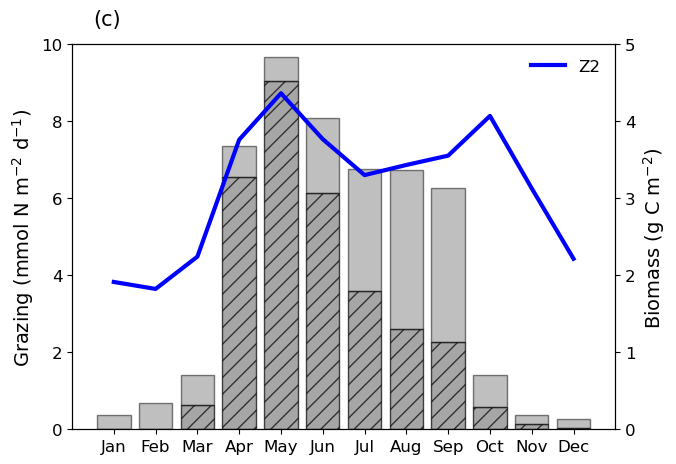

In [52]:
### Plot Figure 6C

fig, ax = plt.subplots(figsize=(7,5))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]

ax2=ax.twinx()

ax2.plot(xticks, NPGO_C_meso,label='Z2',color='b',linewidth=3)

ax.bar(xticks,NPGO_C_Z2diat,color='grey',edgecolor='k',hatch='//',alpha=0.7,label='Diatoms')
ax.bar(xticks,NPGO_C_Z2flag,color='grey',edgecolor='k',label='Nanoflagellates',alpha=0.5,bottom=NPGO_C_Z2diat)



ax2.set_ylim(0,5)
ax2.set_ylabel('Biomass (g C m$^{-2}$)',fontsize=14)

#ax.legend(frameon=False,loc=2)
ax2.legend(frameon=False,loc=1)
ax.set_ylim(0,10)
ax.set_ylabel('Grazing (mmol N m$^{-2}$ d$^{-1}$)',fontsize=14)
ax.set_xlabel('',fontsize=14)
#ax.tick_params(axis='x', labelrotation=0)

ax.text(-.5, 10.5, '(c)', fontsize=15,  color='k')

ax.set_title('',fontsize=18)

#plt.savefig('Fig6c.png', bbox_inches='tight',dpi=1000,transparent=False)

Text(0.5, 1.0, '')

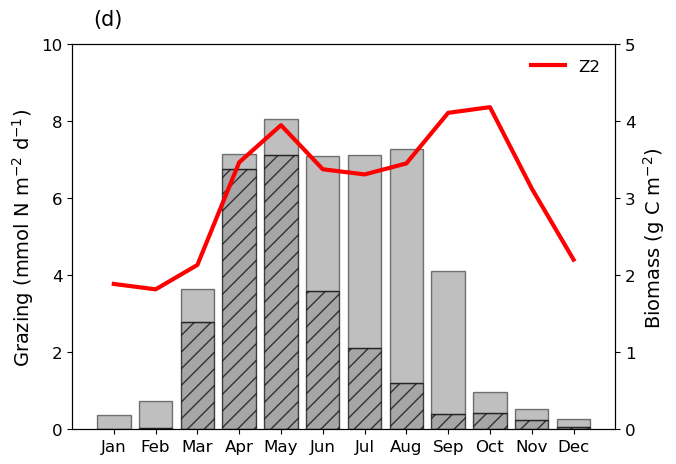

In [53]:
### Plot Figure 6d


fig, ax = plt.subplots(figsize=(7,5))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]

ax2=ax.twinx()

ax2.plot(xticks, NPGO_W_meso,label='Z2',color='r',linestyle='-',linewidth=3)


ax.bar(xticks,NPGO_W_Z2diat,color='grey',edgecolor='k',hatch='//',alpha=0.7,label='Diatoms')
ax.bar(xticks,NPGO_W_Z2flag,color='grey',edgecolor='k',label='Nanoflagellates',alpha=0.5,bottom=NPGO_W_Z2diat)



ax2.set_ylim(0,5)
ax2.set_ylabel('Biomass (g C m$^{-2}$)',fontsize=14)

ax2.legend(frameon=False,loc=1)
ax.set_ylim(0,10)
ax.set_ylabel('Grazing (mmol N m$^{-2}$ d$^{-1}$)',fontsize=14)
ax.set_xlabel('',fontsize=14)

#ax.tick_params(axis='x', labelrotation=0)
ax.text(-.5, 10.5, '(d)', fontsize=15,  color='k')
ax.set_title('',fontsize=18)

#plt.savefig('Fig6d.png', bbox_inches='tight',dpi=1000,transparent=False)

### Plot all on one figure

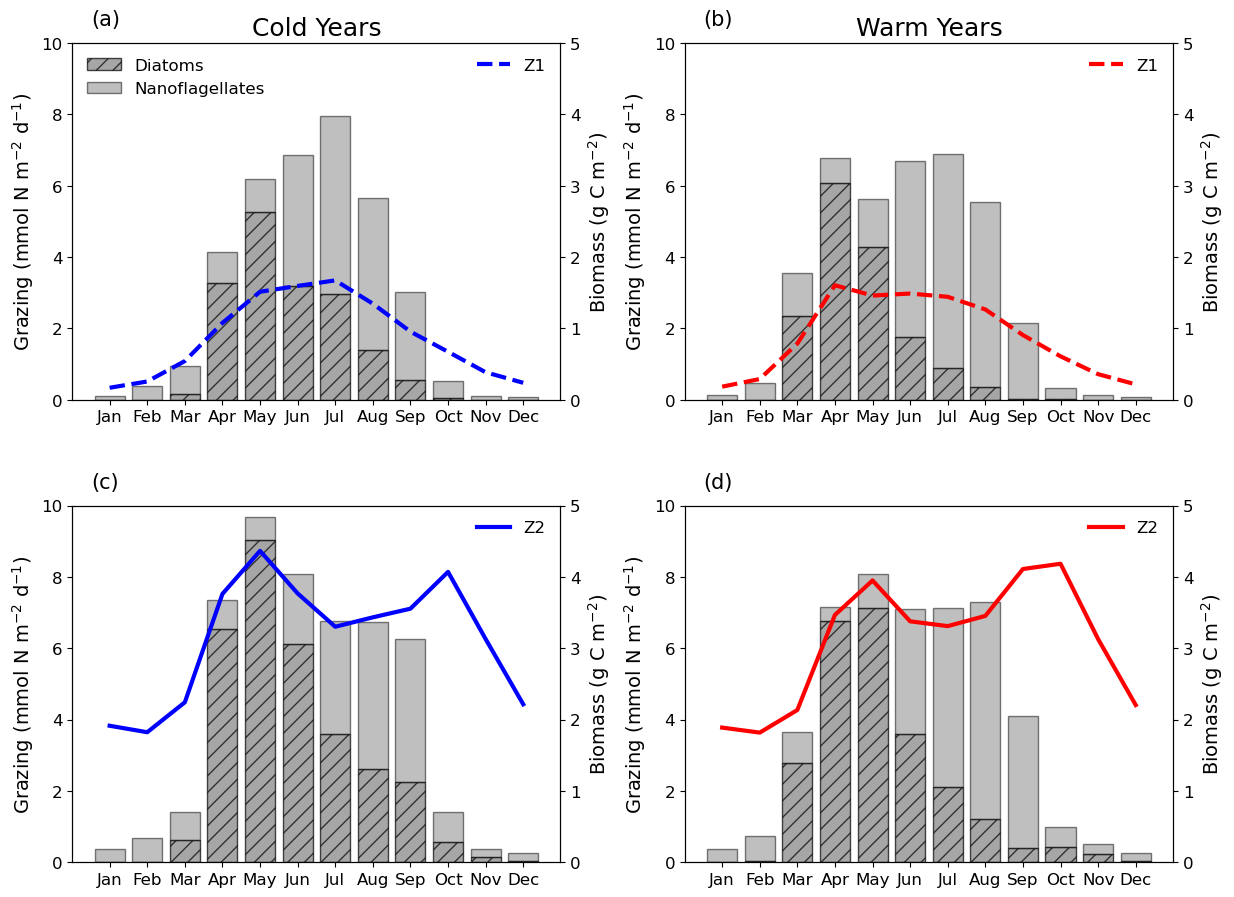

In [62]:

fig, ax = plt.subplots(2,2,figsize=(13,10))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]

fig.tight_layout(pad=4.5)


### PLOT FOR Z1 COLD YEARS

ax2 = ax[0,0].twinx()

ax2.plot(xticks, NPGO_C_micro,label='Z1',color='b',linestyle='--',linewidth=3)


ax[0,0].bar(xticks,NPGO_C_Z1diat,color='grey',edgecolor='k',hatch='//',alpha=0.7,label='Diatoms')
ax[0,0].bar(xticks,NPGO_C_Z1flag,color='grey',edgecolor='k',label='Nanoflagellates',alpha=0.5,bottom=NPGO_C_Z1diat)



ax2.set_ylim(0,5)
ax2.set_ylabel('Biomass (g C m$^{-2}$)',fontsize=14)

ax[0,0].legend(frameon=False,loc=2)
ax2.legend(frameon=False,loc=1)
ax[0,0].set_ylim(0,10)
ax[0,0].set_ylabel('Grazing (mmol N m$^{-2}$ d$^{-1}$)',fontsize=14)
ax[0,0].set_xlabel('',fontsize=14)
#ax.tick_params(axis='x', labelrotation=0)

ax[0,0].text(-.5, 10.5, '(a)', fontsize=15,  color='k')

ax[0,0].set_title('Cold Years',fontsize=18)


### PLOT FOR Z1 WARM YEARS
ax3=ax[0,1].twinx()

ax3.plot(xticks, NPGO_W_micro,label='Z1',color='r',linestyle='--',linewidth=3)


ax[0,1].bar(xticks,NPGO_W_Z1diat,color='grey',edgecolor='k',hatch='//',alpha=0.7,label='Diatoms')
ax[0,1].bar(xticks,NPGO_W_Z1flag,color='grey',edgecolor='k',label='Nanoflagellates',alpha=0.5,bottom=NPGO_W_Z1diat)



ax3.set_ylim(0,5)
ax3.set_ylabel('Biomass (g C m$^{-2}$)',fontsize=14)

ax3.legend(frameon=False,loc=1)
ax[0,1].set_ylim(0,10)
ax[0,1].set_ylabel('Grazing (mmol N m$^{-2}$ d$^{-1}$)',fontsize=14)
ax[0,1].set_xlabel('',fontsize=14)

#ax.tick_params(axis='x', labelrotation=0)
ax[0,1].text(-.5, 10.5, '(b)', fontsize=15,  color='k')

ax[0,1].set_title('Warm Years',fontsize=18)



### PLOT FOR Z2 COLD YEARS
ax4=ax[1,0].twinx()

ax4.plot(xticks, NPGO_C_meso,label='Z2',color='b',linewidth=3)

ax[1,0].bar(xticks,NPGO_C_Z2diat,color='grey',edgecolor='k',hatch='//',alpha=0.7,label='Diatoms')
ax[1,0].bar(xticks,NPGO_C_Z2flag,color='grey',edgecolor='k',label='Nanoflagellates',alpha=0.5,bottom=NPGO_C_Z2diat)



ax4.set_ylim(0,5)
ax4.set_ylabel('Biomass (g C m$^{-2}$)',fontsize=14)

#ax.legend(frameon=False,loc=2)
ax4.legend(frameon=False,loc=1)
ax[1,0].set_ylim(0,10)
ax[1,0].set_ylabel('Grazing (mmol N m$^{-2}$ d$^{-1}$)',fontsize=14)
ax[1,0].set_xlabel('',fontsize=14)
#ax.tick_params(axis='x', labelrotation=0)

ax[1,0].text(-.5, 10.5, '(c)', fontsize=15,  color='k')

ax[1,0].set_title('',fontsize=18)


### PLOT FOR Z2 WARM YEARS
ax5=ax[1,1].twinx()

ax5.plot(xticks, NPGO_W_meso,label='Z2',color='r',linestyle='-',linewidth=3)


ax[1,1].bar(xticks,NPGO_W_Z2diat,color='grey',edgecolor='k',hatch='//',alpha=0.7,label='Diatoms')
ax[1,1].bar(xticks,NPGO_W_Z2flag,color='grey',edgecolor='k',label='Nanoflagellates',alpha=0.5,bottom=NPGO_W_Z2diat)



ax5.set_ylim(0,5)
ax5.set_ylabel('Biomass (g C m$^{-2}$)',fontsize=14)

ax5.legend(frameon=False,loc=1)
ax[1,1].set_ylim(0,10)
ax[1,1].set_ylabel('Grazing (mmol N m$^{-2}$ d$^{-1}$)',fontsize=14)
ax[1,1].set_xlabel('',fontsize=14)

#ax.tick_params(axis='x', labelrotation=0)
ax[1,1].text(-.5, 10.5, '(d)', fontsize=15,  color='k')
ax[1,1].set_title('',fontsize=18)

#plt.savefig('Figure6_ZooplanktonGrazing.png', bbox_inches='tight',dpi=1000,transparent=False)
